In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
import pandas as pd
pd.set_option('display.max_columns', 50)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv('data.csv')
display(df.describe())
display(df.head())

,tradedate,size,minexecqty,limitprice,prevailbid,prevailask,prevailbidsize,prevailasksize,dispatcherrebalance,lotsize,adv20d,averagespread,misavgbidsize1min,misavgasksize1min,misavgspread1min,misoddlotvolume1min,misadfvolume1min,misvolume1min,lastordersuccess,lastorderfullsuccess,lastorderduration,lastfillduration,ordersuccess
count,5.614370e+05,561437.000000,561437.000000,561437.000000,561437.000000,561437.000000,5.614370e+05,5.614370e+05,561437.000000,561437.000000,5.520020e+05,561437.000000,5.614370e+05,5.614370e+05,561437.000000,561437.000000,5.614370e+05,5.614370e+05,529609.000000,529609.000000,5.296090e+05,1.898160e+05,561437.000000
mean,2.018092e+07,1070.564386,151.620698,90.271607,90.238413,90.334335,2.733312e+04,1.058217e+04,0.007657,99.963643,3.020715e+06,0.108633,2.728175e+04,1.043485e+04,0.112442,833.155617,1.337353e+04,2.838395e+04,0.037711,0.023653,1.178742e+05,7.550293e+05,0.050210
std,3.496154e+00,3932.985151,658.574288,4103.247585,4102.987908,4104.889918,2.041079e+05,7.392395e+04,0.087169,1.851030,1.289687e+07,3.210330,2.040082e+05,7.338044e+04,3.013354,3630.703340,6.937534e+04,1.450173e+05,0.190496,0.151967,3.894687e+05,9.927687e+05,0.218379
min,2.018091e+07,1.000000,0.000000,0.065000,0.065000,0.065500,1.000000e+00,1.000000e+00,0.000000,1.000000,0.000000e+00,0.000000,1.000000e+00,1.000000e+00,0.000100,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000
25%,2.018091e+07,100.000000,0.000000,10.050000,10.030000,10.060000,3.000000e+02,3.000000e+02,0.000000,100.000000,0.000000e+00,0.012105,3.230000e+02,3.280000e+02,0.010290,0.000000,0.000000e+00,1.000000e+00,0.000000,0.000000,2.490000e+03,5.540250e+04,0.000000
50%,2.018091e+07,300.000000,100.000000,21.800000,21.800000,21.890000,6.000000e+02,6.000000e+02,0.000000,100.000000,4.000000e+05,0.032105,6.620000e+02,7.000000e+02,0.030213,58.000000,3.230000e+02,1.192000e+03,0.000000,0.000000,2.249900e+04,3.134955e+05,0.000000
75%,2.018092e+07,700.000000,100.000000,45.410000,45.380000,45.420000,1.900000e+03,2.100000e+03,0.000000,100.000000,1.000000e+06,0.070000,1.965000e+03,2.228000e+03,0.070000,420.000000,2.555000e+03,7.098000e+03,0.000000,0.000000,3.637400e+04,1.090056e+06,0.000000
max,2.018092e+07,200000.000000,10000.000000,332280.000000,332001.000000,332280.000000,2.544700e+06,1.058900e+06,1.000000,100.000000,1.675000e+08,286.867000,2.533266e+06,1.058900e+06,370.415000,48284.000000,1.657236e+06,2.903405e+06,1.000000,1.000000,5.366258e+06,5.388898e+06,1.000000


,symbol,tradedate,starttime,side,size,strategyphase,venue,venuetype,ordertype,peginstruction,tif,minexecqty,limitprice,prevailbid,prevailask,prevailbidsize,prevailasksize,dispatcherrebalance,lotsize,securitycategory,sector,mktcap,adv20d,averagespread,misbin,misavgbidsize1min,misavgasksize1min,misavgspread1min,misoddlotvolume1min,misadfvolume1min,misvolume1min,lastordersuccess,lastorderfullsuccess,lastorderduration,lastfillduration,ordersuccess
0,C02112214394819,20180914,10:22:03.668,Sell,600,PingDarkTouch,BARX,Dark,LIMIT,NONE,IOC,0,5.78,5.78,5.82,200,200,0,100,COMMON,Energy,SMALL,0.0,0.033333,10:22:00,176,316,0.045597,373,1227,2100,0.0,0.0,862392.0,NaN,0
1,C02112214394819,20180914,10:22:03.668,Sell,500,PingDarkTouch,CICX,Dark,LIMIT,NONE,IOC,0,5.78,5.78,5.82,200,200,0,100,COMMON,Energy,SMALL,0.0,0.033333,10:22:00,176,316,0.045597,373,1227,2100,0.0,0.0,862392.0,NaN,0
2,C102221371819,20180914,10:07:16.012,Sell,100,PingDarkPxImp,UBSA,Dark,LIMIT,MID,IOC,0,22.20,22.20,22.23,500,1700,0,100,FUND,NaN,SMALL,0.0,0.037368,10:07:00,631,1767,0.028370,0,0,200,0.0,0.0,361595.0,NaN,0
3,C02112214394819,20180914,10:22:03.668,Sell,500,PingDarkTouch,JPMX,Dark,LIMIT,NONE,IOC,0,5.78,5.78,5.82,200,200,0,100,COMMON,Energy,SMALL,0.0,0.033333,10:22:00,176,316,0.045597,373,1227,2100,0.0,0.0,862392.0,NaN,0
4,C102221371819,20180914,10:07:16.013,Sell,200,PingDarkTouch,JSES,Single-Dealer,LIMIT,NONE,IOC,0,22.20,22.20,22.23,500,1700,0,100,FUND,NaN,SMALL,0.0,0.037368,10:07:00,631,1767,0.028370,0,0,200,NaN,NaN,NaN,NaN,0


### Class Proportions (Response = 'ordersuccess')

In [3]:
success = df[df['ordersuccess']==1]
fail = df[df['ordersuccess']==0]

success_num = len(success)
fail_num = len(fail)
total = len(df)

print('Number of order successes: ', success_num)
print('Proportion of order successes: ', success_num / (success_num + fail_num))
print('Number of order failures: ', fail_num)
print('Proportion of order failures: ', fail_num / (success_num + fail_num))

Number of order successes:  28190
Proportion of order successes:  0.05021044213331149
Number of order failures:  533247
Proportion of order failures:  0.9497895578666885


### Null Values

In [4]:
# countNaN = len(df) - df.count() #count of NaN values = count of all values (len(df)) - count of non-NaN values (df.count)
# display(countNaN)

## Preprocessing

In [5]:
cont_features = df.loc[:,['size','minexecqty','limitprice','prevailbid','prevailask','prevailbidsize','prevailasksize',
                          'dispatcherrebalance','lotsize','averagespread','misavgbidsize1min','misavgasksize1min', 
                          'misavgspread1min', 'misoddlotvolume1min', 'misadfvolume1min','misvolume1min']]

dummies = pd.get_dummies(df.loc[:,['side','venue','venuetype','securitycategory',
                                   'sector','mktcap']].astype('category'),drop_first=True)

features = pd.concat([cont_features,dummies], axis=1)

response = df.loc[:,'ordersuccess']

df = pd.concat([features,response],axis=1)

## Train / Test Split

In [6]:
train = df.head(round(total*.70))
test = df.tail(round(total*.30))

train_success = train[train['ordersuccess']==1]
train_fail = train[train['ordersuccess']==0]

test_success = test[test['ordersuccess']==1]
test_fail = test[test['ordersuccess']==0]

## Downsampling

In [7]:
downsampled_fails = train_fail.sample(n=len(train_success))

#recombine and shuffle data
train_downsampled = pd.concat([downsampled_fails, train_success],axis=0)
train_downsampled = train_downsampled.sample(frac=1).reset_index(drop=True)

train_downsampled.head()

,size,minexecqty,limitprice,prevailbid,prevailask,prevailbidsize,prevailasksize,dispatcherrebalance,lotsize,averagespread,misavgbidsize1min,misavgasksize1min,misavgspread1min,misoddlotvolume1min,misadfvolume1min,misvolume1min,side_Sell,venue_BAML,venue_BARX,venue_BATS,venue_BATY,venue_BIDS,venue_BLKX,venue_CAES,venue_CDED,...,venuetype_Single-Dealer,securitycategory_COMMON,securitycategory_ETF,securitycategory_FUND,securitycategory_MISC,securitycategory_OTHER_DEP_RCPT,securitycategory_PREFERRED,securitycategory_REIT,securitycategory_RIGHT,securitycategory_UNIT,securitycategory_WARRANT,sector_Communications,sector_Consumer Cyclical,sector_Consumer Non-cyclical,sector_Diversified,sector_Energy,sector_Financial,sector_Government,sector_Industrial,sector_Technology,sector_Test,sector_Utilities,mktcap_MID,mktcap_SMALL,ordersuccess
0,400,100,181.34,181.34,181.50,200,500,0,100,0.218824,286,424,0.179448,904,1998,4054,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100,0,57.43,57.39,57.43,400,300,0,100,0.020000,438,364,0.039418,884,2490,4967,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,300,100,113.94,113.85,113.94,200,100,0,100,0.075294,224,343,0.096404,65,1050,1165,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,300,0,11.64,11.64,11.65,4200,4800,0,100,0.010000,3279,6830,0.010000,608,5842,11657,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
4,3300,100,7.35,7.30,7.35,2024600,74600,0,100,0.056667,2024608,74600,0.050000,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


## More Data Preparation

In [8]:
train_features = train_downsampled.loc[:,train_downsampled.columns != 'ordersuccess']
train_response = train_downsampled.loc[:,'ordersuccess']

test_features = test.loc[:,test.columns != 'ordersuccess']
test_response = test.loc[:,'ordersuccess']

## Model Evaluation Functions

In [9]:
def cm2df(cm, labels): 
    """converts a numpy array confusion matrix to a pandas dataframe, with class labels"""
    df = pd.DataFrame()
    # rows
    for i, row_label in enumerate(labels):
        rowdata={}
        # columns
        for j, col_label in enumerate(labels): 
            rowdata[col_label]=cm[i,j]
        df = df.append(pd.DataFrame.from_dict({row_label:rowdata}, orient='index'))
    return df[labels]

def model_eval(y_test, y_pred): 
    """prints out a confusion matrix (pandas dataframe) and classification report"""
    conf_mat = confusion_matrix(y_test, y_pred)
    cm_as_df=cm2df(conf_mat,[0,1])
    new_names = {0:'Order Fail',1:'Order Success'}
    cm_as_df = cm_as_df.rename(index=new_names, 
                                 columns=new_names)
    print('\n')
    print('CONFUSION MATRIX (predicted along top, actual along side): ')
    display(cm_as_df)

    print('\n')
    print(classification_report(y_test,y_pred,target_names=['Order Fail','Order Success']))
    
def cross_validation(model, features, response, num_folds):
    metrics = ['precision_macro', 'recall_macro', "f1_macro"]
    cv = cross_validate(model, features, response, scoring=metrics, cv=num_folds)
    print("Test data set average precision across 5 folds:")
    print(cv['test_precision_macro'])
    print("\nTest data set average recall across 5 folds:")
    print(cv['test_recall_macro'])
    print("\nTest data set average fscore across 5 folds:")
    print(cv['test_f1_macro'])
    
def plot_roc_curve(model, X_test, y_test):
    probabilities = model.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, probabilities)
    print('AUC: %.3f' % auc)

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_test, probabilities)
    # plot no skill curve
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

## Logistic Regression



CONFUSION MATRIX (predicted along top, actual along side): 


,Order Fail,Order Success
Order Fail,103566,55941
Order Success,2519,6405




               precision    recall  f1-score   support

   Order Fail       0.98      0.65      0.78    159507
Order Success       0.10      0.72      0.18      8924

  avg / total       0.93      0.65      0.75    168431

AUC: 0.721


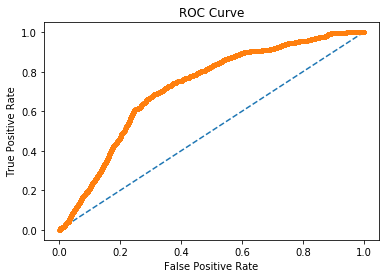

In [10]:
logreg = LogisticRegression()

logreg.fit(train_features, train_response)

y_pred = logreg.predict(test_features)
model_eval(test_response, y_pred)

plot_roc_curve(logreg, test_features, test_response)

# cross_validation(logreg, features, response, 5)

## Decision Tree



CONFUSION MATRIX (predicted along top, actual along side): 


,Order Fail,Order Success
Order Fail,114130,45377
Order Success,2910,6014




               precision    recall  f1-score   support

   Order Fail       0.98      0.72      0.83    159507
Order Success       0.12      0.67      0.20      8924

  avg / total       0.93      0.71      0.79    168431

AUC: 0.695


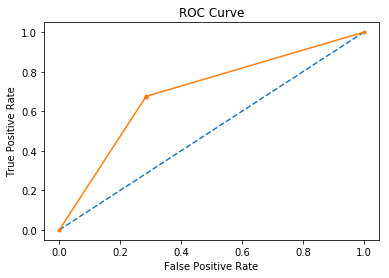

Test data set average precision across 5 folds:
[0.59045372 0.57251927 0.54645998 0.54052513 0.5634318 ]

Test data set average recall across 5 folds:
[0.61321798 0.59326953 0.57827078 0.58323637 0.61420882]

Test data set average fscore across 5 folds:
[0.60005102 0.5809612  0.5551955  0.54777328 0.57725411]


In [11]:
CART = DecisionTreeClassifier()

CART.fit(train_features, train_response)

y_pred = CART.predict(test_features)
model_eval(test_response, y_pred)

plot_roc_curve(CART, test_features, test_response)

cross_validation(CART, features, response, 5)

## Random Forest



CONFUSION MATRIX (predicted along top, actual along side): 


,Order Fail,Order Success
Order Fail,123613,35894
Order Success,2744,6180




               precision    recall  f1-score   support

   Order Fail       0.98      0.77      0.86    159507
Order Success       0.15      0.69      0.24      8924

  avg / total       0.93      0.77      0.83    168431

AUC: 0.825


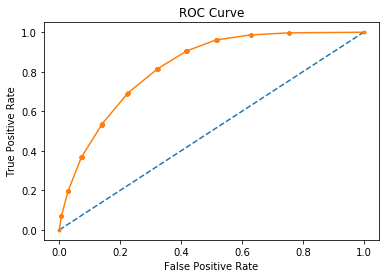

Test data set average precision across 5 folds:
[0.75822379 0.60335907 0.54185473 0.53345454 0.62333387]

Test data set average recall across 5 folds:
[0.55356427 0.53758075 0.52840458 0.528683   0.5541833 ]

Test data set average fscore across 5 folds:
[0.58056993 0.55063193 0.53291118 0.53071711 0.57183476]


In [12]:
RF = RandomForestClassifier()

RF.fit(train_features, train_response)

y_pred = RF.predict(test_features)
model_eval(test_response, y_pred)

plot_roc_curve(RF, test_features, test_response)

cross_validation(RF, features, response, 5)

## KNN



CONFUSION MATRIX (predicted along top, actual along side): 


,Order Fail,Order Success
Order Fail,96646,62861
Order Success,2699,6225




               precision    recall  f1-score   support

   Order Fail       0.97      0.61      0.75    159507
Order Success       0.09      0.70      0.16      8924

  avg / total       0.93      0.61      0.72    168431

AUC: 0.688


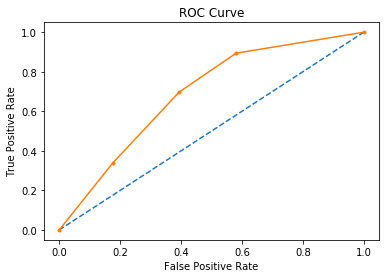

In [13]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(train_features, train_response)

y_pred = knn.predict(test_features)
model_eval(test_response, y_pred)

plot_roc_curve(knn, test_features, test_response)

# cross_validation(knn, features, response, 5)